# Polynomial Regression
![types](poly.png)

In [1]:
import warnings
warnings.filterwarnings('ignore')

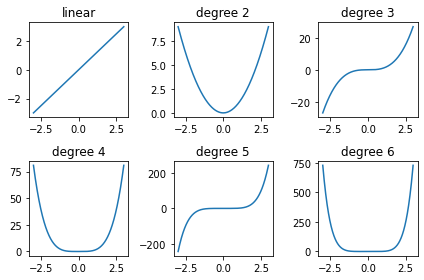

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3,3,1000) # 1000 sample number between -3 to 3
# Plot subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
ax1.plot(x, x)
ax1.set_title('linear')
ax2.plot(x, x**2)
ax2.set_title('degree 2')
ax3.plot(x, x**3)
ax3.set_title('degree 3')
ax4.plot(x, x**4)
ax4.set_title('degree 4')
ax5.plot(x, x**5)
ax5.set_title('degree 5')
ax6.plot(x, x**6)
ax6.set_title('degree 6')
plt.tight_layout()# tidy layout
# --- output ----

    Hours_Studied  Test_Grade
0             0.5          20
1             1.0          21
2             2.0          22
3             3.0          23
4             4.0          25
5             5.0          37
6             6.0          48
7             7.0          56
8             8.0          67
9             9.0          76
10           10.0          90
11           11.0          89
12           12.0          90
Correlation Matrix: 


LinearRegression()

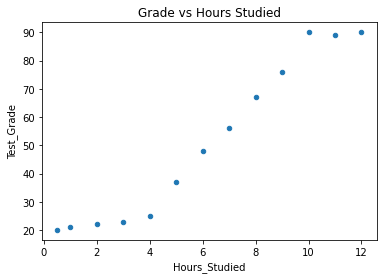

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Load data
df = pd.read_csv('Grade_Set.csv')
print (df)
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
# check the correlation between variables
print("Correlation Matrix: ")
df.corr()
# Create linear regression object
lr = LinearRegression()
x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade # dependent variable
# Train the model using the training sets
lr.fit(x, y)

Text(0.5, 0, 'Hours_Studied')

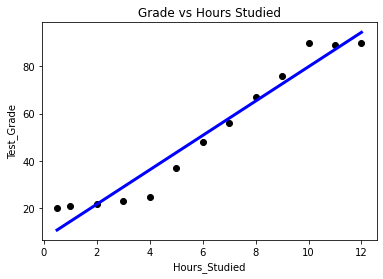

In [4]:
# plotting fitted line
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

0.9503677766997879
0.9608726568678714
0.9938323120374665
0.9955000184096712
0.9956204913897356


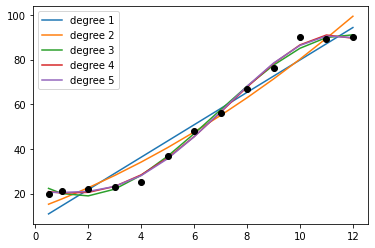

In [5]:
#r-squared for different polynomial degrees
lr = LinearRegression()
x= df.Hours_Studied # independent variable
y= df.Test_Grade # dependent variable
#NumPy's vander function will return powers of the input vector
for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x, deg + 1), y);
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree ' + str(deg));
    plt.legend(loc=2);
    print (r2_score(y, y_lr))
plt.plot(x, y, 'ok')

R Squared using built-in function:  0.9955000184096712


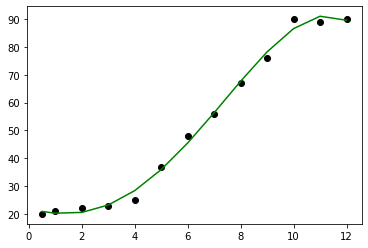

In [6]:
#scikit-learn polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade # dependent variable
degree = 4
model = make_pipeline(PolynomialFeatures(degree), lr)
model.fit(x, y)
plt.scatter(x, y, color='black')
plt.plot(x, model.predict(x), color='green')
print ("R Squared using built-in function: ", r2_score(y, model.predict(x)))